In [1]:
"""gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')"""

"gpu_info = !nvidia-smi\ngpu_info = '\n'.join(gpu_info)\nif gpu_info.find('failed') >= 0:\n  print('Not connected to a GPU')\nelse:\n  print(gpu_info)\n\nfrom psutil import virtual_memory\nram_gb = virtual_memory().total / 1e9\nprint('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))\n\nif ram_gb < 20:\n  print('Not using a high-RAM runtime')\nelse:\n  print('You are using a high-RAM runtime!')"

Importing packages required for our project



In [2]:
import nltk
!pip install vaderSentiment
!pip install eli5
!pip install unidecode
!pip install word2number
!pip install contractions
!pip install nrclex
!pip install pyLDAvis

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.3 MB/s 
     |████████████████████████████████| 133 kB 86.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5bba0cff034a89c7a5a969e8dd2e14ca978a3a51e7ae60e9e3beef906a511578
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requi

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet

from PIL import Image
import seaborn as sns

from bs4 import BeautifulSoup
import spacy
import unidecode
from word2number import w2n
import contractions
import en_core_web_sm
import datetime as dt
import regex as re

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import eli5

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
import re 
import string 
import math

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, Flatten
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
#Importing data
names = ["Review_ID","Rating","Year_Month","Reviewer_Location","Review_text","Location"]
df = pd.read_csv("DisneylandReviews.csv", na_values = 'missing', names = names, skiprows = 1 ,encoding='latin-1', on_bad_lines='skip')
df.dropna(inplace=True)    
df.drop_duplicates(subset="Review_ID",inplace=True,keep='first')
df.reset_index(drop=True, inplace=True)

In [5]:
final_results = []
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_text,Location
0,670772142.0,4.0,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799.0,4.0,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270.0,4.0,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911.0,4.0,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296.0,4.0,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
39954,92198076.0,4.0,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris
39955,92061774.0,4.0,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris
39956,91995748.0,1.0,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris
39957,91984642.0,2.0,2010-12,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris


Data Visualization

In [6]:
df['Location'] = df.Location.str[11:]

disney_ca = df.loc[df['Location'] == "California"]

disney_pa = df.loc[df['Location'] == "Paris"]

disney_hk = df.loc[df['Location'] == "HongKong"]

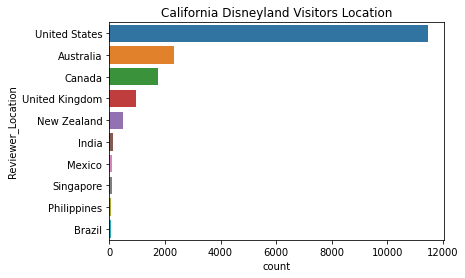

In [7]:
######## California ###################

graph = sns.countplot(y="Reviewer_Location", data=disney_ca, 
              order=disney_ca.Reviewer_Location.value_counts().iloc[:10].index)
graph.set(title='California Disneyland Visitors Location')

fig = graph.get_figure()
fig.savefig("Cali_TextBlob_Imbalanced.png") 

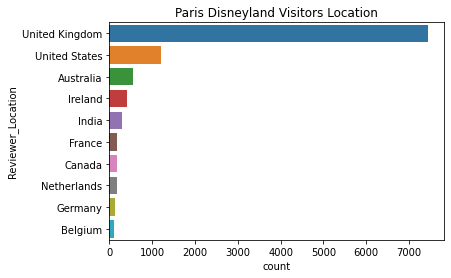

In [8]:
######## Paris ####################

graph = sns.countplot(y="Reviewer_Location", data=disney_pa, 
              order=disney_pa.Reviewer_Location.value_counts().iloc[:10].index)

graph.set(title='Paris Disneyland Visitors Location')
fig = graph.get_figure()
fig.savefig("Paris_TextBlob_Imbalanced.png") 

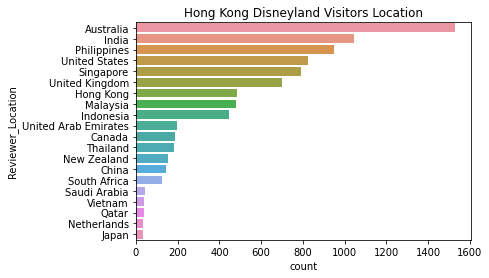

In [9]:
######## Hong Kong ####################

graph = sns.countplot(y="Reviewer_Location", data=disney_hk, 
              order=disney_hk.Reviewer_Location.value_counts().iloc[:20].index)
graph.set(title='Hong Kong Disneyland Visitors Location')
fig = graph.get_figure()
fig.savefig("HK_TextBlob_Imbalanced.png") 

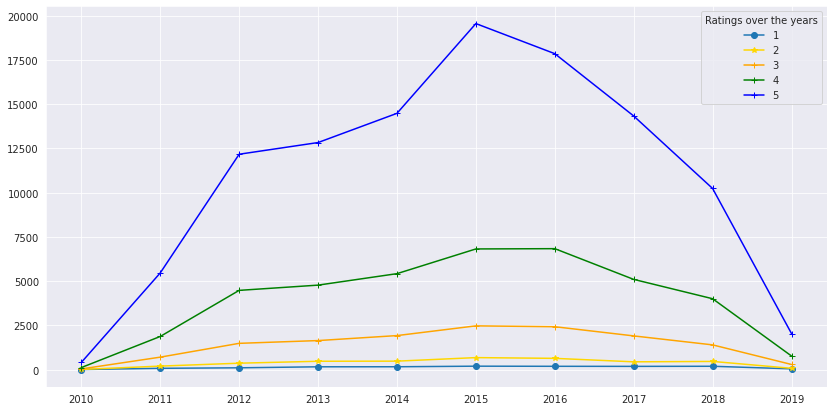

In [10]:
########### Ratings spread across years ####################

df_new = df["Year_Month"].str.split("-", n = 1, expand = True) 
  
# year column
df["year"]= df_new[0] 
  
# month column
df["month"]= df_new[1]

one_rating = df.loc[df['Rating']==1]
one_rating=one_rating.groupby('year',as_index=False).agg({'Rating':'sum'})

two_rating = df.loc[df['Rating']==2]
two_rating=two_rating.groupby('year',as_index=False).agg({'Rating':'sum'})


three_rating = df.loc[df['Rating']==3]
three_rating=three_rating.groupby('year',as_index=False).agg({'Rating':'sum'})

four_rating = df.loc[df['Rating']==4]
four_rating=four_rating.groupby('year',as_index=False).agg({'Rating':'sum'})

fifth_rating = df.loc[df['Rating']==5]
fifth_rating=fifth_rating.groupby('year',as_index=False).agg({'Rating':'sum'})

sns.set_style("darkgrid")
plt.figure(figsize=(14,7))
plt.plot(one_rating['year'] ,one_rating['Rating'],marker='o',label='1') 
plt.plot(two_rating['year'] , two_rating['Rating'],color='gold',marker='*',label='2')  
plt.plot(three_rating['year'] ,three_rating['Rating'],color='orange',marker='+',label='3') 
plt.plot(four_rating['year'] ,four_rating['Rating'],color='green',marker='+',label='4') 
plt.plot(fifth_rating['year'] ,fifth_rating['Rating'],color='blue',marker='+',label='5') 
plt.legend(title='Ratings over the years')
plt.savefig("Rating_Over_Years_Imbalanced.jpg", bbox_inches='tight', dpi = 300)
df = df.dropna() 

Data Cleaning and Preprocessing

In [11]:
# Expanding below mentioned contractions
contractions_dictionary = { 
                     "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have",
                     "didn't": "did not", "didn t": "did not",
                     "couldn't": "could not", "you've": "you have",
                     "don't": "do not", "doesn't": "does not", 
                     "he'd": "he would", "dont": "do not","let's": "let us",
                     "hasn't": "has not","haven't": "have not", "ma'am": "madam",
                     "couldn't've": "could not have", "hadn't": "had not", 
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did", "I've": "I have", "isn't": "is not",
                     "I'd": "I would", "I'd've": "I would have", "hadn't've": "had not have",
                     "I'll've": "I will have","I'm": "I am", "how'll": "how will",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will", "its": "it is",
                     "how'd'y": "how do you", "I'll": "I will", "needn't": "need not",
                     "it'll've": "it will have", "might've": "might have",
                     "mayn't": "may not", "must've": "must have", "she'll've": "she will have",
                     "mightn't've": "might not have", "o'clock": "of the clock",
                     "needn't've": "need not have", "shan't": "shall not",
                     "mustn't": "must not", "oughtn't": "ought not",
                     "oughtn't've": "ought not have", "she'd": "she would",
                     "mightn't": "might not", "she'd've": "she would have",
                     "shan't've": "shall not have", "that'd've": "that would have",
                     "she'll": "she will", "should've": "should have",
                     "mustn't've": "must not have", "sha'n't": "shall not",
                     "shouldn't": "should not", "so've": "so have",
                     "that'd": "that would", "we'll": "we will", "HK": "Hong Kong",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have", "there'd": "there would",
                     "shouldn't've": "should not have", "they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not", "we'd": "we would",
                     "we'd've": "we would have","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "weren't": "were not", "will've": "will have", "you'd": "you would",
                     "why've": "why have", "would've": "would have", "won't": "will not",
                     "won't've": "will not have", "wouldn't": "would not", "you're": "you are",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have", " n d ": " and the ",
                     "y'all've": "you all have", "you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", 
                      " d ": " the ", " n ": " and ", "y'all're": "you all are",
                     "wanna": "want to",  "happi": "happy"}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dictionary.keys()))
df['Review_text'] = df['Review_text'].replace(np.nan, '')

print(contractions_re)

def func_expand_contractions(text, contractions_dictionary=contractions_dictionary):
    def replace(match):
        return contractions_dictionary[match.group(0)]
    return contractions_re.sub(replace, text)

df['Review_Without_Contractions'] = df['Review_text'].apply(lambda x: func_expand_contractions(x))
#df[['Review_text', 'Review_Without_Contractions']].head()
df['Review_Without_Contractions']= df['Review_Without_Contractions'].str.lower()

re.compile("(ain't|'s|aren't|can't|can't've|'cause|could've|didn't|didn t|couldn't|you've|don't|doesn't|he'd|dont|let's|hasn't|haven't|ma'am|couldn't've|hadn't|he'd've|he'll|he'll've|how'd|I've|isn't|I'd|I'd've|)


In [12]:
"""
Removing Stop Words
"""
stop_words= [
            'yourselves', 'between', 'whom', 'well', 'itself',
             'one', 'is', 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', 'having', 'in', 'both', 'for',
             'themselves', 'are', 'them', 'other','and', 'an',
             'during', 'their', 'can','california','yourself',
              'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', 'paris', 'when', 'just', 'that', 'were',
             'very', 'should', 'any', 'y',  'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', 'do', 'on', 'even', 'now', 'her', 've', 'd', 'by', 'am', 'from', 'disneyland',
             'about', 'further', "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most','same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', 'i', 'because', 'does', 'all', 'get','make'
             , 'hong', 'kong', 'hk' ]

df['Review_Without_StopWords'] = df['Review_Without_Contractions'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#df[['Review_Without_Contractions', 'Review_Without_StopWords']].head()

In [13]:
lemmatizer = WordNetLemmatizer()
all_words = []

def part_of_speech_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

def clean_review(text):
    
    """removing punctuations, urls and unnecessary symbols"""
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)

    """removing html tags"""
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text(separator="")

    """removing english dictionary stopwords """
    stopwords = set(STOPWORDS)
    text = text.replace(str(stopwords),"")

    """removing accented characters"""
    text = unidecode.unidecode(text)

    """ lemmatization """ 
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text))
    wordnet_tagged = list(map(lambda x: (x[0], part_of_speech_tagger(x[1])), pos_tagged))

    lemmatized_text = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_text.append(word)
        else:       
            lemmatized_text.append(lemmatizer.lemmatize(word, tag))
    lemmatized_text = " ".join(lemmatized_text)
    
    text = lemmatized_text
    return text

df['Clean_Review_Text'] = df['Review_Without_StopWords'].apply(lambda x: clean_review(x))
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_text,Location,year,month,Review_Without_Contractions,Review_Without_StopWords,Clean_Review_Text
0,670772142.0,4.0,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,if you have ever been to disneyland anywhere y...,if ever anywhere will find similar layout walk...,if ever anywhere will find similar layout walk...
1,670682799.0,4.0,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,its been a while since the last time we visit ...,"since last time visit .. yet, time stay tomorr...",since last time visit yet time stay tomorrowla...
2,670623270.0,4.0,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god it wasn t too hot or too humid wh...,thanks god wasn t hot humid visiting park othe...,thanks god wasn t hot humid visit park otherwi...
3,670607911.0,4.0,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,hong kong disneyland is a great compact park. ...,great compact park. unfortunately quite bit ma...,great compact park unfortunately quite bit mai...
4,670607296.0,4.0,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,"the location is not in the city, took around 1...","location not city, took around 1 hour kowlon, ...",location not city take around hour kowlon kid ...


Detecting Sentiment using Ratings, TextBlob and VADER

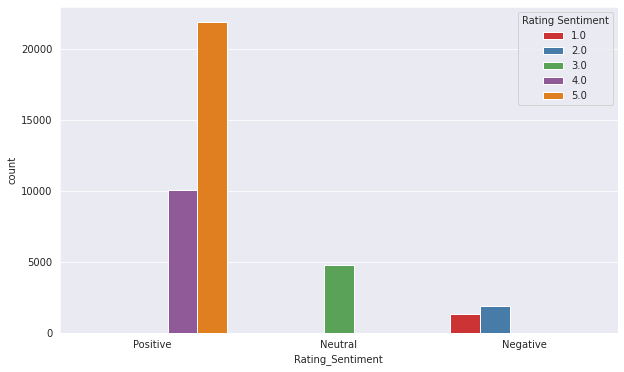

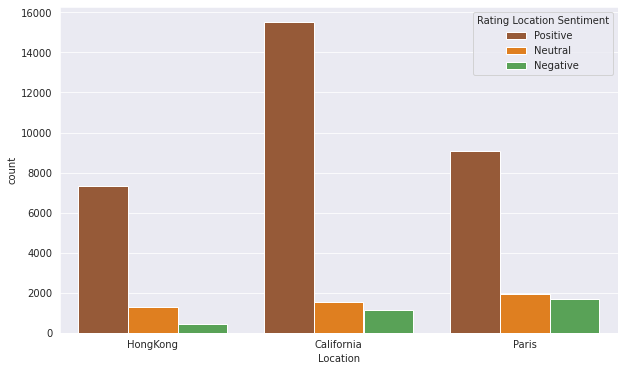

In [14]:
""" Using Rating Column of Dataset"""

def Rating_Sentiment(rating):
    if rating >=4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"
        
df["Rating_Sentiment"] = df["Rating"].apply(lambda x: Rating_Sentiment(x))  

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Rating_Sentiment',hue='Rating',palette='Set1');
plt.legend(title = "Rating Sentiment")
plt.savefig("rating_sentiment.jpg", bbox_inches='tight', dpi = 300)

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Location',hue='Rating_Sentiment',palette='Set1_r');
plt.legend(title = "Rating Location Sentiment")
plt.savefig("Rating_Sentiment_Location_Imbalanced.jpg", bbox_inches='tight', dpi = 300)

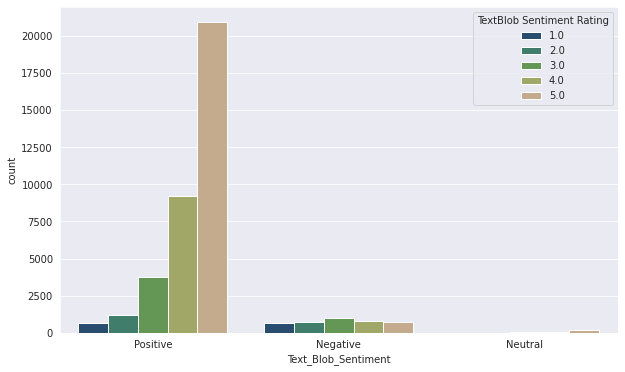

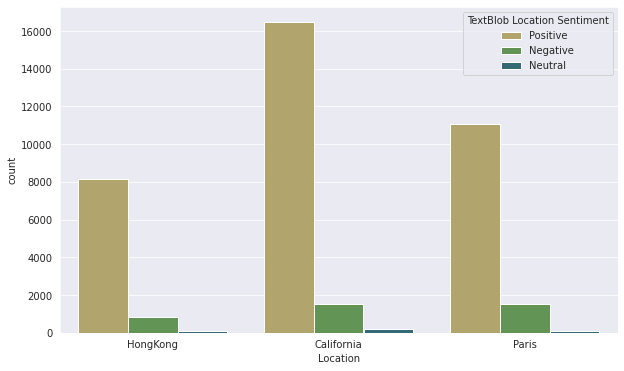

In [15]:
""" Using TextBlob"""

polarity = []

for sentence in df["Clean_Review_Text"]:
    polarity.append(TextBlob(sentence).polarity)

subjectivity = []

for sentence in df["Clean_Review_Text"]:
    subjectivity.append(TextBlob(sentence).subjectivity)

df["Textblob_Polarity"], df["Text_Blob_Subjectivity"] = polarity, subjectivity

df['Text_Blob_Sentiment'] = ''
df.loc[df["Textblob_Polarity"]>0,'Text_Blob_Sentiment']='Positive'
df.loc[df["Textblob_Polarity"]==0,'Text_Blob_Sentiment']='Neutral'
df.loc[df["Textblob_Polarity"]<0,'Text_Blob_Sentiment']='Negative'

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Text_Blob_Sentiment',hue='Rating',palette='gist_earth');
plt.legend(title = "TextBlob Sentiment Rating")
plt.savefig("TextBlob_Sentiment_Rating_Imbalanced.jpg", bbox_inches='tight', dpi = 300)

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Location',hue='Text_Blob_Sentiment',palette='gist_earth_r');
plt.legend(title = "TextBlob Location Sentiment")
plt.savefig("TextBlob_Sentiment_Location_Imbalanced.jpg", bbox_inches='tight', dpi = 300)

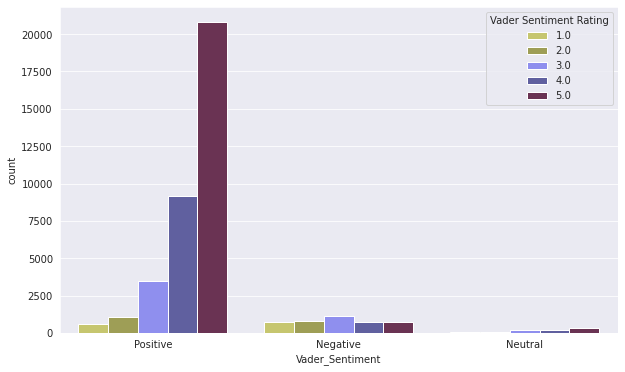

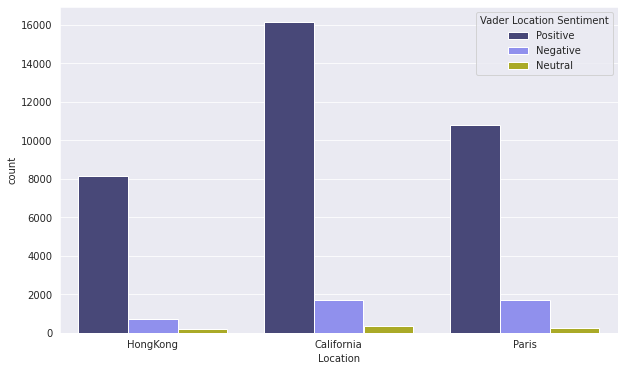

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

vs = []

for sentence in df["Clean_Review_Text"]:
    vs.append(analyzer.polarity_scores(sentence))

df["Vader_Score"] = vs

df['compound'] = df['Vader_Score'].apply(lambda score_dict: score_dict['compound'])
df['Vader_Sentiment']=''
df.loc[df.compound>0.05,'Vader_Sentiment']='Positive'
#df.loc[df.compound<=0.05] and  ,'Vader_Sentiment']='Neutral'

df.loc[(df['compound'] <= 0.05) & (df['compound'] >= -0.05), 'Vader_Sentiment'] = 'Neutral' 

df.loc[df.compound<-0.05,'Vader_Sentiment']='Negative'

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Vader_Sentiment',hue='Rating',palette='gist_stern_r');
plt.legend(title = "Vader Sentiment Rating")
plt.savefig("Vader_Sentiment_Rating_Imbalanced.jpg", bbox_inches='tight', dpi = 300)

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Location',hue='Vader_Sentiment',palette='gist_stern');
plt.legend(title = "Vader Location Sentiment")
plt.savefig("Vader_Sentiment_Location_Imbalanced.jpg", bbox_inches='tight', dpi = 300)

In [17]:
df['Rating_Sentiment'].value_counts()

Positive    31925
Neutral      4771
Negative     3263
Name: Rating_Sentiment, dtype: int64

In [18]:
df['Text_Blob_Sentiment'].value_counts()

Positive    35728
Negative     3903
Neutral       328
Name: Text_Blob_Sentiment, dtype: int64

In [19]:
df['Vader_Sentiment'].value_counts()

Positive    35076
Negative     4097
Neutral       786
Name: Vader_Sentiment, dtype: int64

Emotion Detection

positive        28752
anticipation     5220
trust            2443
negative         1894
surprise          727
fear              629
anger             265
joy                15
sadness            11
disgust             3
Name: visitors_emotion, dtype: int64

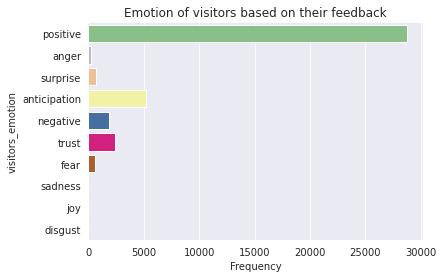

In [20]:
from nrclex import NRCLex

visitors_emotion = []
for i in range(len(df)):  
    visitors_emotions = NRCLex(df['Clean_Review_Text'][i])
    visitors_emotion.append(visitors_emotions.top_emotions[0][0])
df['visitors_emotion'] = visitors_emotion

graph = sns.countplot(y="visitors_emotion", data=df, palette="Accent")
graph.set(xlabel='Frequency', ylabel='visitors_emotion', title = 'Emotion of visitors based on their feedback')

figure = graph.get_figure() 
figure.savefig('Visitors_Emotion_TextBlob_Imbalanced.jpg', dpi=300, bbox_inches='tight')

df['visitors_emotion'].value_counts()

In [21]:
len(df)

39959

Word Clouds

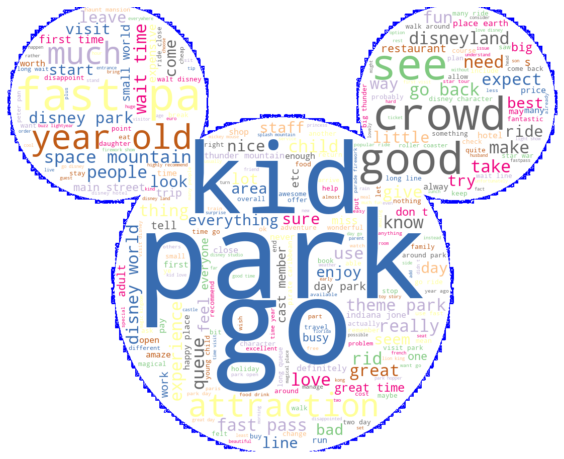

In [22]:
""" Wordcloud for all the cleaned reviews"""

extra_words = ['us', 'still', 'though', 'although', 'will', 'must', 'either', 'well', 'especially', 'say', 'find', 'think']

Reviews_Text = df['Clean_Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (extra_words)]))
Reviews_Text = " ".join(txt for txt in Reviews_Text)

c_mask = np.array(Image.open("Mickey_Mouse.jpg"))

wc = WordCloud(background_color='white', mask=c_mask, mode='RGB',
               width=300, max_words=300, height=300,
               random_state=1, contour_width=1, contour_color='blue',colormap='Accent_r')

image_colors = ImageColorGenerator(c_mask)
wc.generate(Reviews_Text)
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.savefig("All_Reviews_TextBlob_Imbalanced.jpg", bbox_inches='tight', dpi = 300)
plt.show()

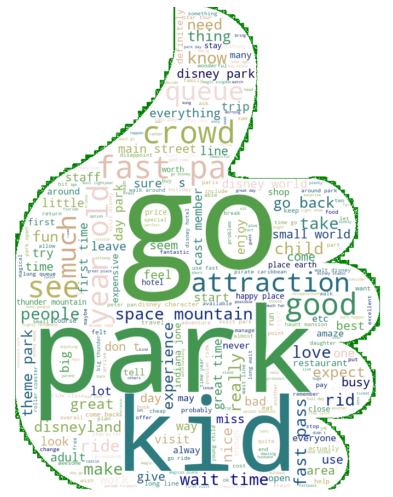

In [23]:
"""Word Cloud for Positive Text_Blob_Sentiment """

df_like = df.loc[df['Text_Blob_Sentiment']=='Positive']

rev_text = df_like['Clean_Review_Text']

Reviews_Text = rev_text.apply(lambda x: ' '.join([word for word in x.split() if word not in (extra_words)]))
Reviews_Text = " ".join(insul for insul in Reviews_Text)

l_mask = np.array(Image.open("Thumbs_Up.jpg"))
#== 
wc = WordCloud(background_color='white', mask=l_mask, mode='RGB',
               width=300, max_words=300, height=300,
               random_state=1, contour_width=1, contour_color='green',colormap='gist_earth')

wc.generate(Reviews_Text)
plt.figure(figsize=(7, 7))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.savefig("Positive_reviews_TextBlob_Imbalanced.jpg", bbox_inches='tight', dpi = 300)
plt.show()

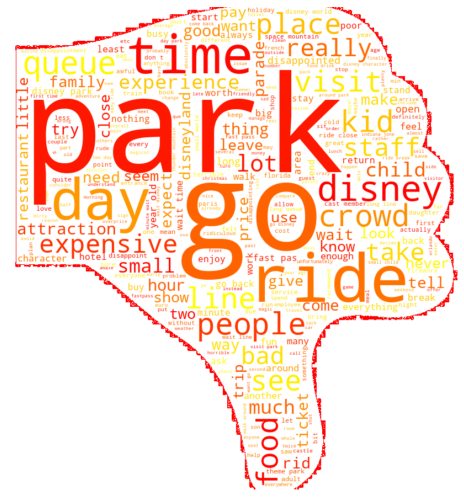

In [24]:
"""Word Cloud for Negative Text_Blob_Sentiment"""

df_like = df.loc[df['Text_Blob_Sentiment']=='Negative']
Reviews_Text = df_like["Clean_Review_Text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (extra_words)]))

Reviews_Text = " ".join(insul for insul in Reviews_Text)

l_mask = np.array(Image.open("Thumbs_Down.jpg"))
#== 
wc = WordCloud(background_color='white', mask=l_mask, mode='RGB',
               width=300, max_words=300, height=300,
               random_state=1, contour_width=1, contour_color='red',colormap='autumn')
wc.generate(Reviews_Text)
plt.figure(figsize=(7, 7))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.savefig("Negative_reviews_TextBlob_Imbalanced.jpg", bbox_inches='tight', dpi = 300)
plt.show()

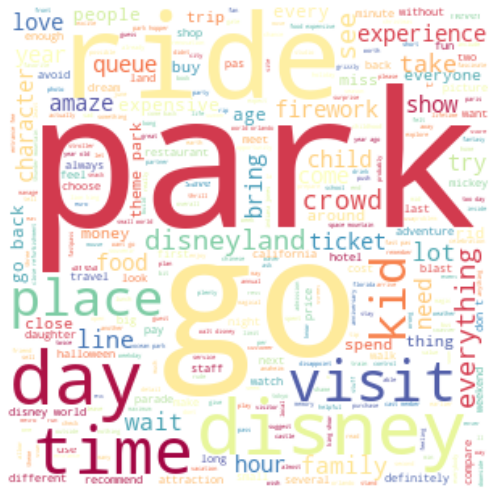

In [25]:
"""Word Cloud for Neutral Text_Blob_Sentiment """

df_like = df.loc[df['Text_Blob_Sentiment']=='Neutral']

rev_text = df_like['Clean_Review_Text']

Reviews_Text = rev_text.apply(lambda x: ' '.join([word for word in x.split() if word not in (extra_words)]))
Reviews_Text = " ".join(insul for insul in Reviews_Text)

wc = WordCloud(background_color='white', mode='RGB',
               width=300, max_words=300, height=300,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')

wc.generate(Reviews_Text)
plt.figure(figsize=(7, 7))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.savefig("Neutral_reviews_TextBlob_Imbalanced.jpg", bbox_inches='tight', dpi = 300)
plt.show()

Frequency Distribution of Words

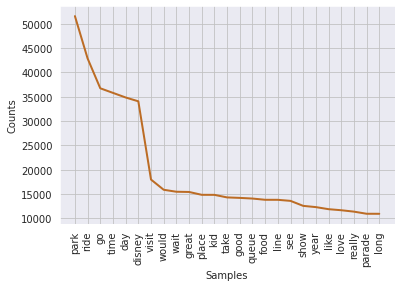

In [26]:
"""getting frequency distribution of words from Reviews"""

review_text = " ".join(review for review in df["Clean_Review_Text"])
review_text = review_text.lower()
cleaned_text = re.sub('\W', ' ', review_text)
stopword = stopwords.words("english")
stopword.extend(stop_words)
word_tokens = nltk.word_tokenize(cleaned_text)
wordtokens = [word for word in word_tokens]
processed_review_text = [word for word in wordtokens if word not in stopword]
freq = FreqDist(processed_review_text)
freq.plot(25, color='#bc6c25')

n-gram associations

In [27]:
"""Bigram and Trigram Associations"""

bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()

locate_bigrams = nltk.collocations.BigramCollocationFinder.from_words(processed_review_text)
locate_trigrams = nltk.collocations.TrigramCollocationFinder.from_words(processed_review_text)

bigram_frequency = locate_bigrams.ngram_fd.items()
frequency_table_for_bigrams = pd.DataFrame(list(bigram_frequency), columns=['bigram','freq']).sort_values(by='freq', ascending=False)

In [28]:
#get adjectives and nouns 

def func_for_bigrams_filter(ngram):
    if '-pron-' in ngram or '' in ngram or ' 'in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in stop_words:
            return False
    acceptable_types = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in acceptable_types and tags[1][1] in second_type:
        return True
    else:
        return False

In [29]:
bigram_filter = frequency_table_for_bigrams[frequency_table_for_bigrams.bigram.map(lambda x: func_for_bigrams_filter(x))]
bigram_filter.head(10)

,bigram,freq
65,"(space, mountain)",3418
1561,"(wait, time)",3077
118,"(theme, park)",2722
252,"(disney, world)",2704
539,"(disney, park)",2666
529,"(great, time)",2158
71,"(cast, member)",2150
11,"(small, world)",2126
6,"(main, street)",2103
1321,"(day, park)",2056


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


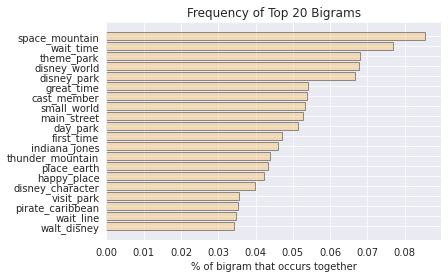

In [30]:
bigram_string = bigram_filter['bigram'].tolist()
bigram_string[1]

#combine tuple
bigram_string[1][0] +'_' + bigram_string[1][1] 

#combine all tuples in df
bigram = [ ]
for c in range(0, len(bigram_string)):
    bigram.append(bigram_string[c][0] +'_' + bigram_string[c][1]) 

bigram_filter['bigram_combo'] = bigram

top20_bigram = bigram_filter[:20]

plt.barh(top20_bigram['bigram_combo'], top20_bigram['freq']/len(df), color ='#f6bd60', alpha = 0.4, 
         edgecolor = 'black', linewidth = 1)
plt.xlabel("% of bigram that occurs together")
plt.gca().invert_yaxis()
plt.title("Frequency of Top 20 Bigrams")
plt.savefig("Top_20_Bigrams_Imbalanced.jpg", bbox_inches='tight', dpi = 300)
plt.show()

In [31]:
### Do the same for trigrams
trigram_frequency = locate_trigrams.ngram_fd.items()
frequency_table_for_trigrams = pd.DataFrame(list(trigram_frequency), columns=['trigram','freq']).sort_values(by='freq', ascending=False)
frequency_table_for_trigrams.head(5).reset_index(drop=True)

#filter NN and ADJ in trigrams
def func_for_trigrams_filter(ngram):
    if '-pron-' in ngram or '' in ngram or ' 'in ngram or '  ' in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in stop_words:
            return False
    first_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    third_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in first_type and tags[2][1] in third_type:
        return True
    else:
        return False

In [32]:
trigram_filter = frequency_table_for_trigrams[frequency_table_for_trigrams.trigram.map(lambda x: func_for_trigrams_filter(x))]
trigram_filter.head(10)

,trigram,freq
98,"(happy, place, earth)",1410
6342,"(big, thunder, mountain)",900
6058,"(use, fast, pas)",663
372328,"(day, park, hopper)",496
230334,"(walt, disney, studio)",457
4396,"(year, old, daughter)",455
2203,"(walt, disney, world)",413
556,"(lion, king, show)",409
1250,"(toy, story, land)",408
16740,"(use, fast, pass)",391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


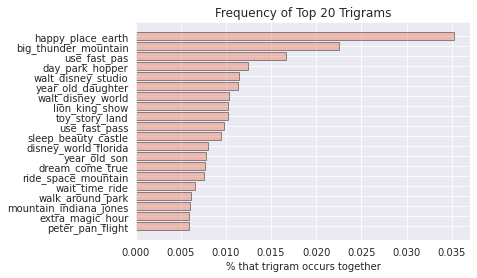

In [33]:
trigram_string = trigram_filter['trigram'].tolist()

trigram = [ ]
for c in range(0, len(trigram_string)):
    trigram.append(trigram_string[c][0] + '_' + trigram_string[c][1] + '_' + trigram_string[c][2]) 

trigram_filter['trigram_combo'] = trigram
top20_trigram = trigram_filter[:20]

#plot frequency of trigram that occurs out of all ca reviews
plt.barh(top20_trigram['trigram_combo'], top20_trigram['freq']/len(df), color ='#e76f51', alpha = 0.4, 
         edgecolor = 'black', linewidth = 1)
plt.xlabel("% that trigram occurs together")
plt.gca().invert_yaxis()
#plt.ylabel("Counts")
plt.title("Frequency of Top 20 Trigrams")
plt.savefig("Top_20_trigrams_Imbalanced.jpg", bbox_inches='tight', dpi = 300)
plt.show()

Topic Modelling

In [34]:
"""Topic Modeling"""
def tokenize_sentences(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = df.Clean_Review_Text.values.tolist()

data_words = list(tokenize_sentences(data))
#data_words[:1]

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Bigram example
print(bigram_mod[bigram_mod[data_words[0]]])

# Trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['if', 'ever', 'anywhere', 'will', 'find', 'similar', 'layout', 'walk', 'main_street', 'familiar', 'feel', 'ride', 'small', 'world', 'absolutely', 'fabulous', 'worth', 'do', 'day', 'visit', 'fairly', 'hot', 'relatively', 'busy', 'but', 'queue', 'move', 'fairly', 'well']
['if', 'ever', 'anywhere', 'will', 'find', 'similar', 'layout', 'walk', 'main_street', 'familiar', 'feel', 'ride', 'small', 'world', 'absolutely', 'fabulous', 'worth', 'do', 'day', 'visit', 'fairly', 'hot', 'relatively', 'busy', 'but', 'queue', 'move', 'fairly', 'well']


In [35]:
def generate_bigrams_lda(texts):
    return [bigram_mod[doc] for doc in texts]

def generate_trigrams_lda(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Form Bigrams
data_words_bigrams = generate_bigrams_lda(data_words)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
normalized_data = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(normalized_data[:1])

[['ever', 'anywhere', 'find', 'similar', 'layout', 'walk', 'main_street', 'familiar', 'feel', 'ride', 'small', 'world', 'absolutely', 'fabulous', 'worth', 'day', 'visit', 'fairly', 'hot', 'relatively', 'busy', 'queue', 'move', 'fairly', 'well']]


In [36]:
# Create Dictionary
id2word = corpora.Dictionary(normalized_data)

# Create Corpus
texts = normalized_data

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

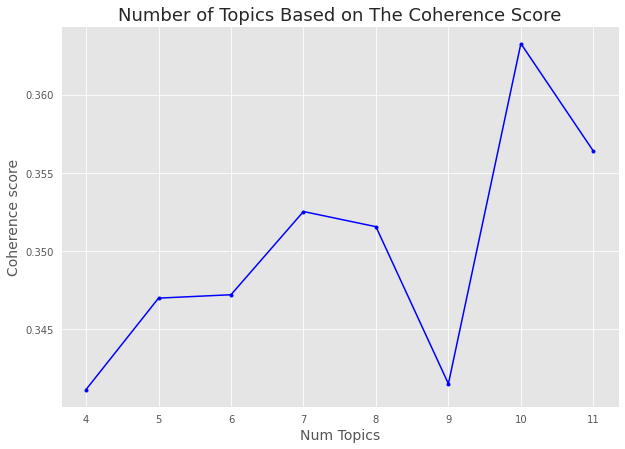

In [37]:
def compute_coherence_values(dictionary, corpus, texts, start, stop):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                              num_topics=num_topics,
                                              id2word=id2word,
                                              random_state=90,
                                              alpha='auto',
                                              eta='auto',
                                              per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,
                             dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
start=4
stop=12
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                    corpus=corpus,
                                    texts=normalized_data,
                                    start=start, stop=stop)
x = range(start, stop)
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.plot(x, coherence_values, color = "blue",marker=".")
plt.xlabel("Num Topics", size=14)
plt.ylabel("Coherence score", size=14)
plt.title('Number of Topics Based on The Coherence Score',size=18)
plt.savefig("k_Topic_Imbalanced.jpg", bbox_inches='tight', dpi = 300)
plt.show()

In [38]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

print(lda_model.print_topics())
doc_lda = lda_model[corpus]

print('\n LDA Model Perplexity: ', lda_model.log_perplexity(corpus))

coherence_model_lda = CoherenceModel(model=lda_model, texts=normalized_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n LDA Model Coherence Score: ', coherence_lda)

lda_model.save('disney_lda_train_10_TextBlob_Imbalanced.model')

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, 'disney_lda_10_TextBlob_Imbalanced.html')
vis

[(0, '0.206*"year" + 0.135*"old" + 0.064*"daughter" + 0.052*"princess" + 0.031*"meet" + 0.030*"son" + 0.024*"girl" + 0.019*"birthday" + 0.019*"ago" + 0.018*"boy"'), (1, '0.098*"park" + 0.042*"ride" + 0.039*"day" + 0.037*"visit" + 0.033*"time" + 0.031*"disney" + 0.022*"much" + 0.020*"close" + 0.019*"attraction" + 0.017*"many"'), (2, '0.127*"hotel" + 0.049*"stay" + 0.047*"studio" + 0.033*"room" + 0.032*"breakfast" + 0.025*"euro" + 0.018*"bus" + 0.014*"table" + 0.012*"buffet" + 0.009*"tour"'), (3, '0.103*"mountain" + 0.067*"space" + 0.052*"thunder" + 0.033*"land" + 0.024*"big" + 0.017*"buzz_lightyear" + 0.017*"pirate_caribbean" + 0.014*"fantasyland" + 0.013*"car" + 0.012*"ride"'), (4, '0.085*"staff" + 0.044*"people" + 0.023*"say" + 0.023*"tell" + 0.023*"smoke" + 0.022*"friendly" + 0.020*"helpful" + 0.019*"ask" + 0.016*"push" + 0.015*"rude"'), (5, '0.049*"go" + 0.044*"ride" + 0.033*"time" + 0.030*"wait" + 0.024*"get" + 0.023*"day" + 0.023*"hour" + 0.020*"fast" + 0.019*"take" + 0.019*"long"

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.214095  0.049424       1        1  23.282383
1     -0.272743 -0.070586       2        1  22.072294
7     -0.212579  0.066263       3        1  20.345835
9     -0.213129 -0.098141       4        1  16.706361
4      0.010019  0.114109       5        1   4.446569
6      0.143531  0.286199       6        1   3.362237
3      0.148013 -0.212614       7        1   3.108847
2      0.192524  0.134955       8        1   2.872397
0      0.180672 -0.207908       9        1   2.740832
8      0.237787 -0.061701      10        1   1.062245, topic_info=            Term          Freq         Total Category  logprob  loglift
64          park  48847.000000  48847.000000  Default  30.0000  30.0000
396         year  11315.000000  11315.000000  Default  29.0000  29.0000
14         queue  18700.000000  18700.000000  Default  28.0000  28.0000
190       ticket   8030.000000   8030.000000  Default  27.0000  27.0000
402          old   7422.000000   7422.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
4976  girlfriend    105.998918    106.675156  Topic10  -5.3023   4.5384
8576    dreadful    105.717760    106.393997  Topic10  -5.3050   4.5384
1351     contact    123.903012    126.692919  Topic10  -5.1463   4.5225
2943        roll    215.603138    324.900501  Topic10  -4.5923   4.1347
1000      inform    127.610167    188.499702  Topic10  -5.1168   4.1547

[552 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         2  0.002419     absolutely
0         3  0.042574     absolutely
0         4  0.954529     absolutely
3565      6  0.998249  accommodation
1020      2  0.995954       addition
...     ...       ...            ...
23        2  0.106710          worth
23        3  0.198988          worth
23        4  0.669588          worth
1328      9  0.996002     worthwhile
396       9  0.999907           year

[950 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 8, 10, 5, 7, 4, 3, 1, 9])

Classification Using Ratings

In [39]:
conditions = [df['Text_Blob_Sentiment'] == 'Positive',
              df['Text_Blob_Sentiment'] == 'Neutral',
              df['Text_Blob_Sentiment'] == 'Negative']
choices = [1,2,3]
df['Text_Blob_Sentiment_Value'] = np.select(conditions, choices, default=0)

df['Text_Blob_Sentiment_Value'] = df['Text_Blob_Sentiment_Value'].astype(np.int32)

In [40]:
df_main_class = df[["Clean_Review_Text","Text_Blob_Sentiment_Value"]]

X = df_main_class["Clean_Review_Text"]
Y = df_main_class["Text_Blob_Sentiment_Value"]

In [41]:
# Splitting the data into train and test data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2)

In [42]:
def classification(vectorizer, model, model_name, fit_vect =True):
    if fit_vect:
        vectorizer.fit(X_train)
    train_vec = vectorizer.transform(X_train)
    test_vec = vectorizer.transform(X_test)
    model.fit(train_vec, Y_train)
    train_preds = model.predict(train_vec)
    train_f1 = f1_score(Y_train, train_preds, average='micro')
    test_preds = model.predict(test_vec)
    test_f1 = f1_score(Y_test, test_preds, average='micro')

    print(classification_report(Y_test, test_preds))
    
    cf_mat = confusion_matrix(Y_test, test_preds)
    print(model_name + " Imabalanced Dataset Confusion Matrix: \n" + str(cf_mat) + "\n")

    ax = sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, 
                fmt='.2%', cmap='Blues')

    ax.set_title( model_name +' Imabalanced Dataset Confusion Matrix\n');
    ax.set_xlabel('\nPredicted TextBlob Sentiment')
    ax.set_ylabel('Actual TextBlob Sentiment');

    ax.xaxis.set_ticklabels(['Positive','Neutral', 'Negative'])
    ax.yaxis.set_ticklabels(['Positive','Neutral', 'Negative'])

    plt.show()

    final_results.append(test_f1)

    return train_f1, test_f1     

Bag of Words

              precision    recall  f1-score   support

           1       0.92      0.98      0.95      7154
           2       1.00      0.02      0.03        63
           3       0.54      0.27      0.36       775

    accuracy                           0.90      7992
   macro avg       0.82      0.42      0.44      7992
weighted avg       0.88      0.90      0.88      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6977    0  177]
 [  60    1    2]
 [ 567    0  208]]



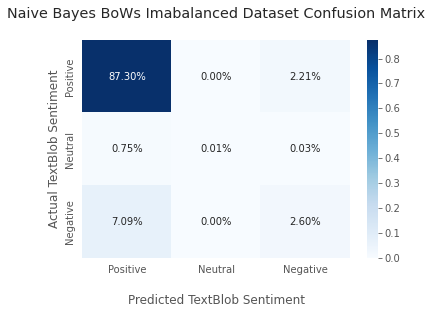

              precision    recall  f1-score   support

           1       0.94      0.94      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.46      0.47      0.47       775

    accuracy                           0.89      7992
   macro avg       0.80      0.48      0.48      7992
weighted avg       0.89      0.89      0.88      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6725    0  429]
 [  59    1    3]
 [ 408    0  367]]



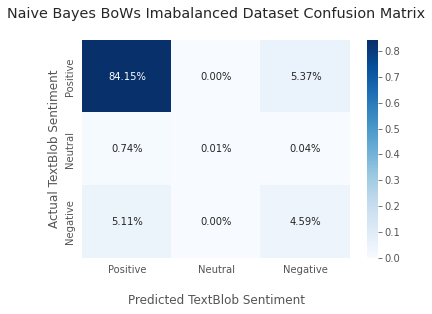

0.1 => (0.9203240842118434, 0.8875125125125125)
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.46      0.47      0.47       775

    accuracy                           0.89      7992
   macro avg       0.80      0.48      0.48      7992
weighted avg       0.89      0.89      0.88      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6720    0  434]
 [  59    1    3]
 [ 407    0  368]]



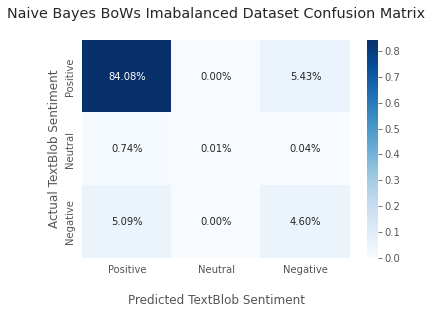

0.15000000000000002 => (0.9174773985672725, 0.887012012012012)
              precision    recall  f1-score   support

           1       0.93      0.94      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.46      0.47      0.47       775

    accuracy                           0.89      7992
   macro avg       0.80      0.48      0.48      7992
weighted avg       0.89      0.89      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6736    0  418]
 [  59    1    3]
 [ 411    0  364]]



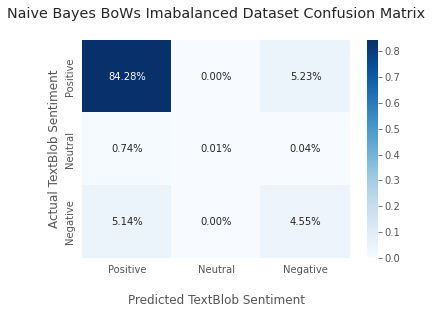

0.20000000000000004 => (0.9150686645603279, 0.8885135135135135)
              precision    recall  f1-score   support

           1       0.93      0.94      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.47      0.46      0.46       775

    accuracy                           0.89      7992
   macro avg       0.80      0.47      0.48      7992
weighted avg       0.89      0.89      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6753    0  401]
 [  59    1    3]
 [ 419    0  356]]



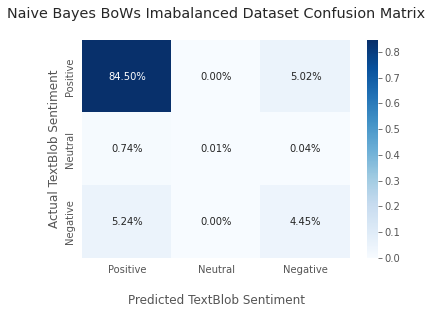

0.25000000000000006 => (0.913692245127788, 0.8896396396396397)
              precision    recall  f1-score   support

           1       0.93      0.94      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.47      0.45      0.46       775

    accuracy                           0.89      7992
   macro avg       0.80      0.47      0.48      7992
weighted avg       0.89      0.89      0.88      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6758    0  396]
 [  60    1    2]
 [ 428    0  347]]



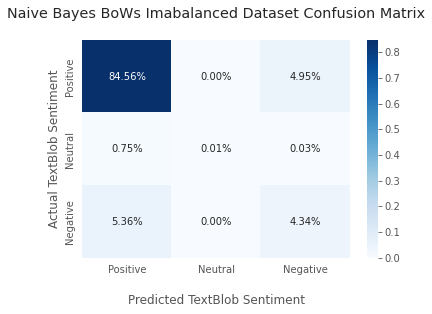

0.30000000000000004 => (0.9129414708918572, 0.8891391391391391)
              precision    recall  f1-score   support

           1       0.93      0.95      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.48      0.43      0.46       775

    accuracy                           0.89      7992
   macro avg       0.80      0.47      0.48      7992
weighted avg       0.89      0.89      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6790    0  364]
 [  60    1    2]
 [ 438    0  337]]



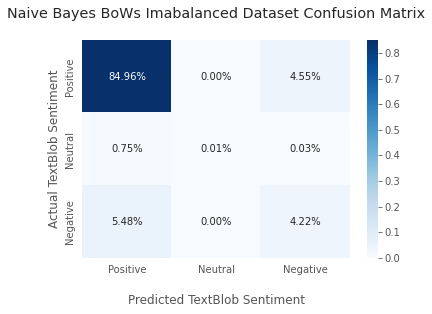

0.3500000000000001 => (0.91244095473457, 0.8918918918918919)
              precision    recall  f1-score   support

           1       0.93      0.95      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.49      0.42      0.45       775

    accuracy                           0.89      7992
   macro avg       0.81      0.46      0.48      7992
weighted avg       0.89      0.89      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6808    0  346]
 [  60    1    2]
 [ 446    0  329]]



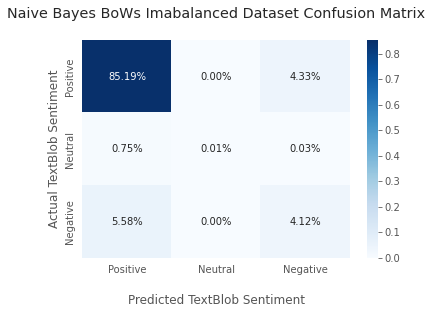

0.40000000000000013 => (0.912785059592705, 0.8931431431431432)
              precision    recall  f1-score   support

           1       0.93      0.95      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.49      0.41      0.44       775

    accuracy                           0.89      7992
   macro avg       0.81      0.46      0.47      7992
weighted avg       0.89      0.89      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6826    0  328]
 [  60    1    2]
 [ 459    0  316]]



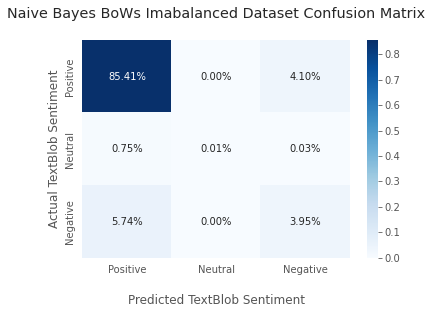

0.45000000000000007 => (0.91244095473457, 0.8937687687687688)
              precision    recall  f1-score   support

           1       0.93      0.96      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.50      0.40      0.44       775

    accuracy                           0.90      7992
   macro avg       0.81      0.46      0.47      7992
weighted avg       0.89      0.90      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6844    0  310]
 [  60    1    2]
 [ 467    0  308]]



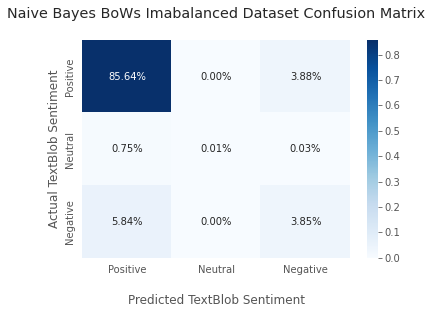

0.5000000000000001 => (0.9131917289705008, 0.89502002002002)
              precision    recall  f1-score   support

           1       0.93      0.96      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.51      0.39      0.44       775

    accuracy                           0.90      7992
   macro avg       0.81      0.45      0.47      7992
weighted avg       0.89      0.90      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6868    0  286]
 [  60    1    2]
 [ 475    0  300]]



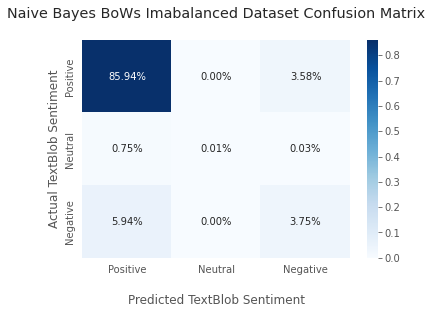

0.5500000000000002 => (0.9131917289705008, 0.897022022022022)
              precision    recall  f1-score   support

           1       0.93      0.96      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.51      0.38      0.44       775

    accuracy                           0.90      7992
   macro avg       0.81      0.45      0.47      7992
weighted avg       0.89      0.90      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6874    0  280]
 [  60    1    2]
 [ 478    0  297]]



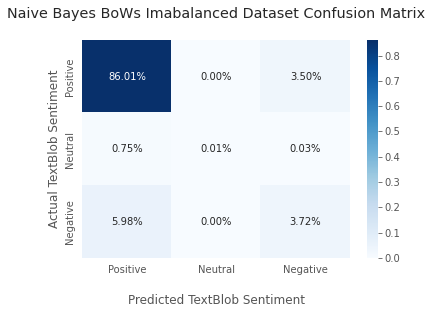

0.6000000000000002 => (0.9132855757499921, 0.8973973973973975)
              precision    recall  f1-score   support

           1       0.93      0.96      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.52      0.37      0.43       775

    accuracy                           0.90      7992
   macro avg       0.81      0.45      0.47      7992
weighted avg       0.89      0.90      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6888    0  266]
 [  60    1    2]
 [ 487    0  288]]



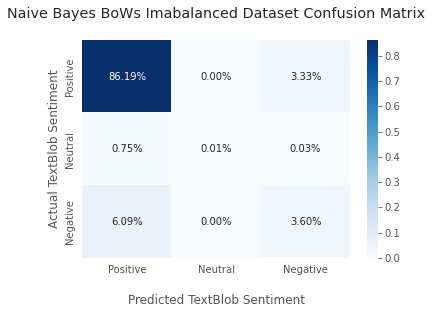

0.6500000000000001 => (0.9136609628679576, 0.8980230230230231)
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.52      0.35      0.42       775

    accuracy                           0.90      7992
   macro avg       0.82      0.44      0.47      7992
weighted avg       0.89      0.90      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6907    0  247]
 [  60    1    2]
 [ 503    0  272]]



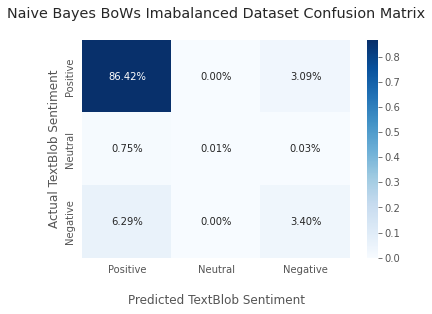

0.7000000000000002 => (0.9140676322457534, 0.8983983983983984)
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.52      0.34      0.41       775

    accuracy                           0.90      7992
   macro avg       0.82      0.44      0.46      7992
weighted avg       0.89      0.90      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6917    0  237]
 [  60    1    2]
 [ 514    0  261]]



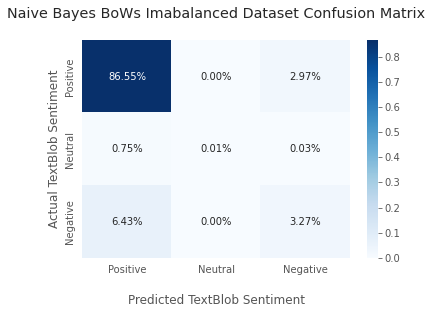

0.7500000000000002 => (0.9149122532611755, 0.8982732732732732)
              precision    recall  f1-score   support

           1       0.92      0.97      0.95      7154
           2       1.00      0.02      0.03        63
           3       0.53      0.32      0.40       775

    accuracy                           0.90      7992
   macro avg       0.82      0.44      0.46      7992
weighted avg       0.88      0.90      0.89      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6933    0  221]
 [  60    1    2]
 [ 525    0  250]]



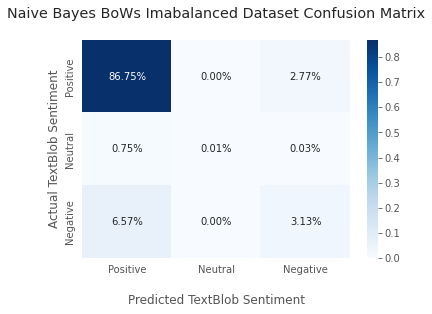

0.8000000000000002 => (0.9152563581193105, 0.8988988988988988)
              precision    recall  f1-score   support

           1       0.92      0.97      0.95      7154
           2       1.00      0.02      0.03        63
           3       0.53      0.31      0.39       775

    accuracy                           0.90      7992
   macro avg       0.82      0.43      0.46      7992
weighted avg       0.88      0.90      0.88      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6942    0  212]
 [  60    1    2]
 [ 535    0  240]]



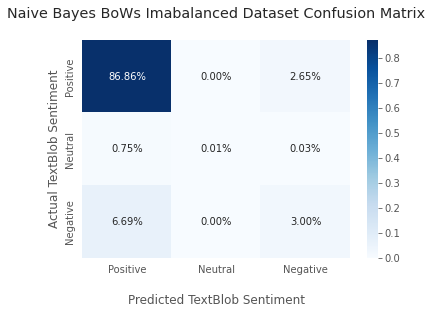

0.8500000000000002 => (0.91591328557575, 0.8987737737737739)
              precision    recall  f1-score   support

           1       0.92      0.97      0.95      7154
           2       1.00      0.02      0.03        63
           3       0.53      0.30      0.38       775

    accuracy                           0.90      7992
   macro avg       0.82      0.43      0.45      7992
weighted avg       0.88      0.90      0.88      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6954    0  200]
 [  60    1    2]
 [ 543    0  232]]



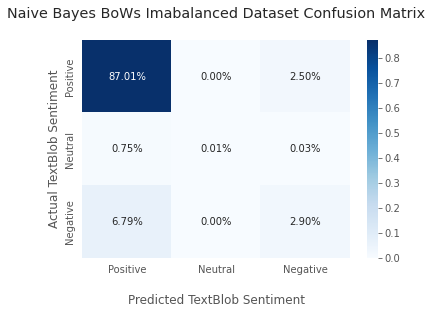

0.9000000000000002 => (0.9162886726937154, 0.8992742742742743)
              precision    recall  f1-score   support

           1       0.92      0.97      0.95      7154
           2       1.00      0.02      0.03        63
           3       0.54      0.29      0.37       775

    accuracy                           0.90      7992
   macro avg       0.82      0.43      0.45      7992
weighted avg       0.88      0.90      0.88      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6964    0  190]
 [  60    1    2]
 [ 553    0  222]]



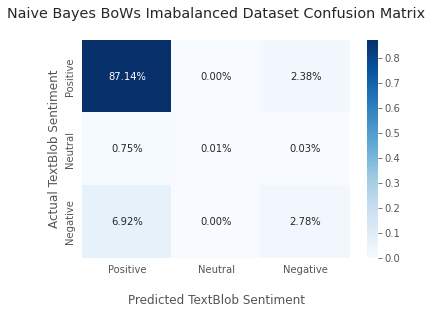

0.9500000000000003 => (0.9165076485125285, 0.8992742742742743)
              precision    recall  f1-score   support

           1       0.92      0.98      0.95      7154
           2       1.00      0.02      0.03        63
           3       0.54      0.27      0.36       775

    accuracy                           0.90      7992
   macro avg       0.82      0.42      0.44      7992
weighted avg       0.88      0.90      0.88      7992

Naive Bayes BoWs Imabalanced Dataset Confusion Matrix: 
[[6977    0  177]
 [  60    1    2]
 [ 567    0  208]]



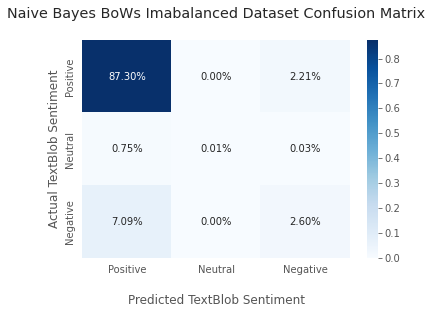

1.0000000000000004 => (0.9166014952920198, 0.8991491491491492)


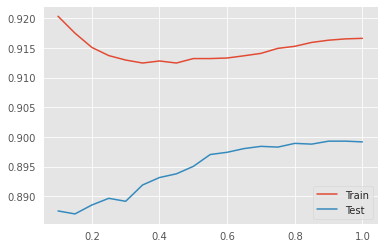

In [43]:
#1 NB - No Alpha Value
# Bag of words
vectorizer = CountVectorizer()
NB = MultinomialNB()
classification(vectorizer,NB,'Naive Bayes BoWs', fit_vect = True)

#1 NB - Different Alpha Values
arange = np.arange(0.1, 1.01, 0.05)
results = []
for a in arange:
  model = MultinomialNB(alpha=a)
  res = classification(vectorizer,model, 'Naive Bayes BoWs')
  results.append(res)
  print(a, '=>', res)
  
plt.plot(arange, results)
plt.legend(["Train", "Test"])
plt.show()

              precision    recall  f1-score   support

           1       0.96      0.98      0.97      7154
           2       0.33      0.02      0.03        63
           3       0.76      0.66      0.70       775

    accuracy                           0.94      7992
   macro avg       0.68      0.55      0.57      7992
weighted avg       0.93      0.94      0.94      7992

Logistic Regression BoWs Imabalanced Dataset Confusion Matrix: 
[[7004    1  149]
 [  49    1   13]
 [ 264    1  510]]



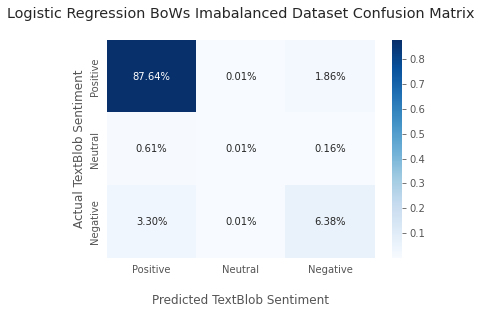

(0.9833578377702005, 0.9403153153153153)

In [44]:
#2 Logistic Regression
# Bag of words
vectorizer = CountVectorizer()
lr = LogisticRegression(max_iter =300, solver = "liblinear")
classification(vectorizer,lr,'Logistic Regression BoWs', fit_vect = True)

              precision    recall  f1-score   support

           1       0.90      1.00      0.95      7154
           2       1.00      0.02      0.03        63
           3       1.00      0.02      0.03       775

    accuracy                           0.90      7992
   macro avg       0.97      0.34      0.34      7992
weighted avg       0.91      0.90      0.85      7992

Random Forest BoWs  Imabalanced Dataset Confusion Matrix: 
[[7154    0    0]
 [  62    1    0]
 [ 763    0   12]]



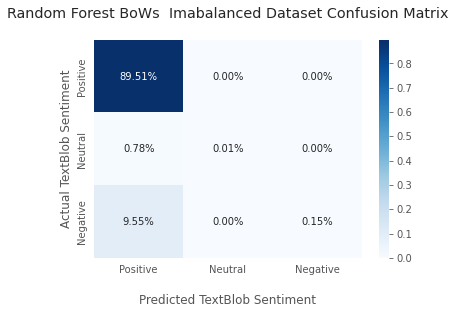

(0.9999687177401696, 0.8967717717717718)

In [45]:
#3 Random Forest
# Bag of words
vectorizer = CountVectorizer()
rf = RandomForestClassifier()
classification(vectorizer,rf,'Random Forest BoWs ', fit_vect = True)

TF-IDF

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.90      1.00      0.94      7154
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00       775

    accuracy                           0.90      7992
   macro avg       0.30      0.33      0.31      7992
weighted avg       0.80      0.90      0.85      7992

Naive Bayes TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7154    0    0]
 [  63    0    0]
 [ 775    0    0]]



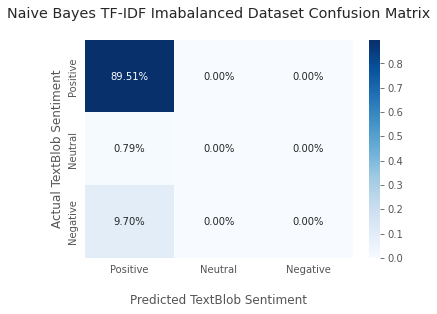

unigram => (0.8940157036944348, 0.8951451451451452)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.90      1.00      0.94      7154
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00       775

    accuracy                           0.90      7992
   macro avg       0.30      0.33      0.31      7992
weighted avg       0.80      0.90      0.85      7992

Naive Bayes TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7154    0    0]
 [  63    0    0]
 [ 775    0    0]]



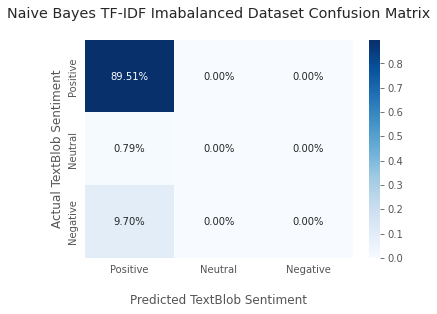

bigram => (0.8938592923952826, 0.8951451451451452)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.90      1.00      0.94      7154
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00       775

    accuracy                           0.90      7992
   macro avg       0.30      0.33      0.31      7992
weighted avg       0.80      0.90      0.85      7992

Naive Bayes TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7154    0    0]
 [  63    0    0]
 [ 775    0    0]]



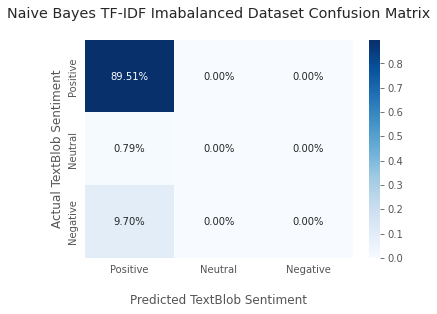

trigram => (0.8941721149935872, 0.8951451451451452)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.90      1.00      0.94      7154
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00       775

    accuracy                           0.90      7992
   macro avg       0.30      0.33      0.31      7992
weighted avg       0.80      0.90      0.85      7992

Naive Bayes TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7154    0    0]
 [  63    0    0]
 [ 775    0    0]]



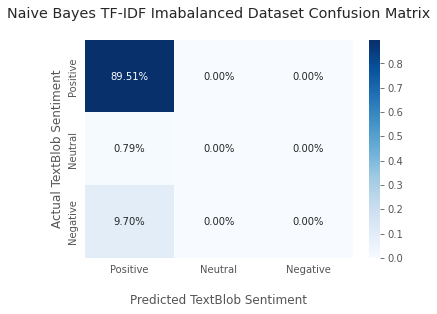

combined => (0.8938592923952826, 0.8951451451451452)


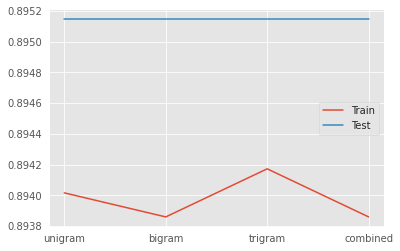

In [46]:
#1 NB
# different ngrams with a fixed alpha for Naive Bayes
tfidf_bigram = TfidfVectorizer(ngram_range=(2,2))
tfidf_trigram = TfidfVectorizer(ngram_range=(3,3))
tfidf_combined = TfidfVectorizer(ngram_range=(1,3))
tfidf = TfidfVectorizer()
tfidf_vectorizers = [tfidf, tfidf_bigram, tfidf_trigram, tfidf_combined]
vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
xs = list(range(len(tfidf_vectorizers)))
results = []

for i in range(len(tfidf_vectorizers)):
  model = MultinomialNB(alpha=1.0)
  res = classification(tfidf_vectorizers[i], model,'Naive Bayes TF-IDF')
  results.append(res)
  print(vectorizer_names[i], '=>', res)
  
plt.plot(xs, results)
plt.xticks(xs, vectorizer_names)
plt.legend(["Train", "Test"])
plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.93      1.00      0.96      7154
           2       0.00      0.00      0.00        63
           3       0.89      0.34      0.49       775

    accuracy                           0.92      7992
   macro avg       0.60      0.45      0.48      7992
weighted avg       0.91      0.92      0.91      7992

Logistic Regression TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7121    0   33]
 [  62    0    1]
 [ 511    0  264]]



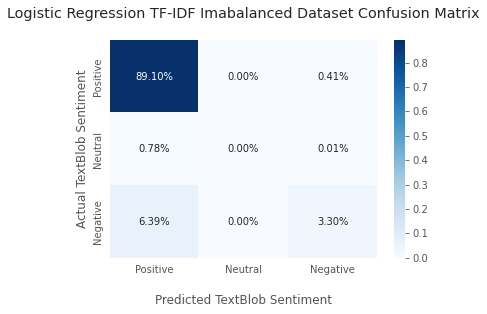

unigram => (0.9342446898363937, 0.924049049049049)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.90      1.00      0.94      7154
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00       775

    accuracy                           0.90      7992
   macro avg       0.30      0.33      0.31      7992
weighted avg       0.80      0.90      0.85      7992

Logistic Regression TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7154    0    0]
 [  63    0    0]
 [ 775    0    0]]



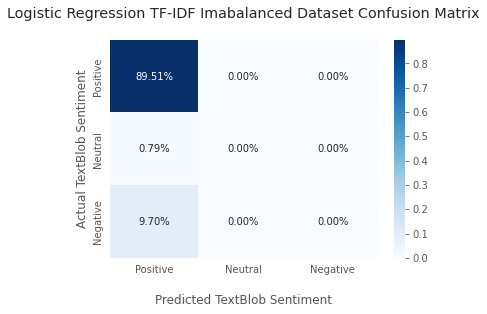

bigram => (0.8941721149935872, 0.8951451451451452)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.90      1.00      0.94      7154
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00       775

    accuracy                           0.90      7992
   macro avg       0.30      0.33      0.31      7992
weighted avg       0.80      0.90      0.85      7992

Logistic Regression TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7154    0    0]
 [  63    0    0]
 [ 775    0    0]]



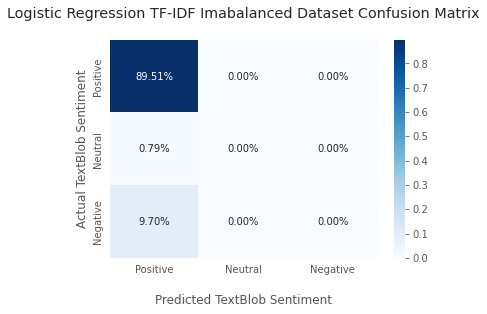

trigram => (0.8938592923952826, 0.8951451451451452)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.90      1.00      0.95      7154
           2       0.00      0.00      0.00        63
           3       0.96      0.06      0.12       775

    accuracy                           0.90      7992
   macro avg       0.62      0.35      0.36      7992
weighted avg       0.90      0.90      0.86      7992

Logistic Regression TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7152    0    2]
 [  63    0    0]
 [ 726    0   49]]



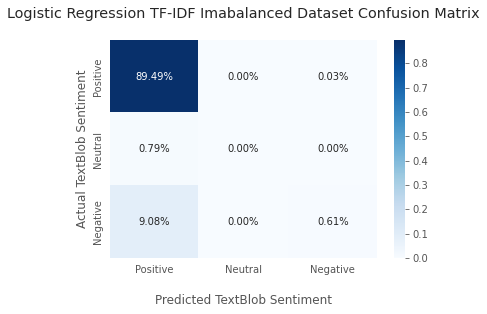

combined => (0.8997716395032377, 0.901026026026026)


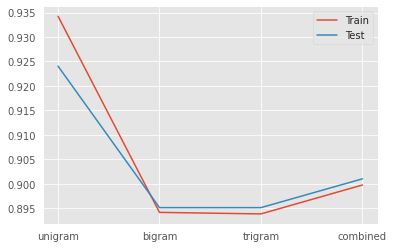

In [47]:
#2 Logistic Regression

tfidf_bigram = TfidfVectorizer(ngram_range=(2,2))
tfidf_trigram = TfidfVectorizer(ngram_range=(3,3))
tfidf_combined = TfidfVectorizer(ngram_range=(1,3))
tfidf = TfidfVectorizer()
tfidf_vectorizers = [tfidf, tfidf_bigram, tfidf_trigram, tfidf_combined]
vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
xs = list(range(len(tfidf_vectorizers)))
results = []

for i in range(len(tfidf_vectorizers)):
  model = LogisticRegression(solver = "liblinear")
  res = classification(tfidf_vectorizers[i], model, 'Logistic Regression TF-IDF')
  results.append(res)
  print(vectorizer_names[i], '=>', res)
  
plt.plot(xs, results)
plt.xticks(xs, vectorizer_names)
plt.legend(["Train", "Test"])
plt.show() 

              precision    recall  f1-score   support

           1       0.90      1.00      0.95      7154
           2       1.00      0.02      0.03        63
           3       1.00      0.01      0.02       775

    accuracy                           0.90      7992
   macro avg       0.97      0.34      0.33      7992
weighted avg       0.91      0.90      0.85      7992

Random Forest TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7154    0    0]
 [  62    1    0]
 [ 767    0    8]]



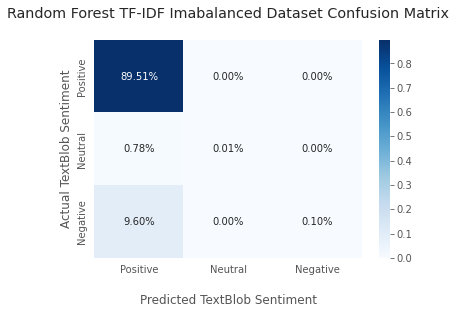

unigram => (1.0, 0.8962712712712713)
              precision    recall  f1-score   support

           1       0.90      1.00      0.95      7154
           2       1.00      0.02      0.03        63
           3       0.92      0.02      0.03       775

    accuracy                           0.90      7992
   macro avg       0.94      0.34      0.34      7992
weighted avg       0.90      0.90      0.85      7992

Random Forest TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7153    0    1]
 [  62    1    0]
 [ 763    0   12]]



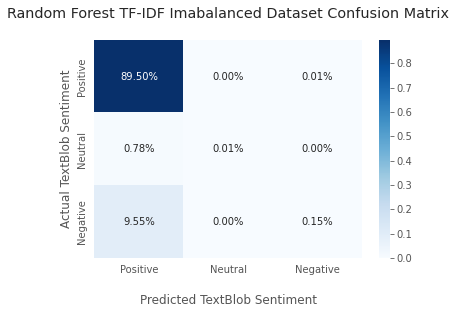

bigram => (0.9998435887008478, 0.8966466466466466)
              precision    recall  f1-score   support

           1       0.90      1.00      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.67      0.01      0.01       775

    accuracy                           0.90      7992
   macro avg       0.85      0.34      0.33      7992
weighted avg       0.87      0.90      0.85      7992

Random Forest TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7152    0    2]
 [  62    1    0]
 [ 771    0    4]]



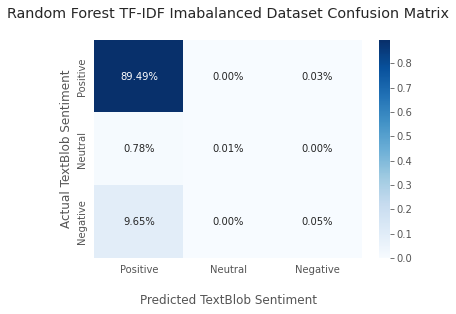

trigram => (0.9997497419213563, 0.8955205205205207)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.90      1.00      0.94      7154
           2       1.00      0.02      0.03        63
           3       0.00      0.00      0.00       775

    accuracy                           0.90      7992
   macro avg       0.63      0.34      0.33      7992
weighted avg       0.81      0.90      0.85      7992

Random Forest TF-IDF Imabalanced Dataset Confusion Matrix: 
[[7154    0    0]
 [  62    1    0]
 [ 775    0    0]]



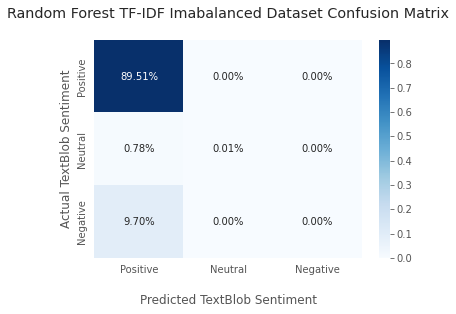

combined => (1.0, 0.8952702702702703)


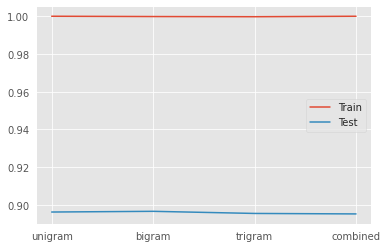

In [48]:
#3 Random Forest - worst performance as per time taken
tfidf = TfidfVectorizer()
tfidf_bigram = TfidfVectorizer(ngram_range=(2,2))
tfidf_trigram = TfidfVectorizer(ngram_range=(3,3))
tfidf_combined = TfidfVectorizer(ngram_range=(1,3))
tfidf_vectorizers = [tfidf, tfidf_bigram, tfidf_trigram, tfidf_combined]
vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
xs = list(range(len(tfidf_vectorizers)))
results = []

for i in range(len(tfidf_vectorizers)):
  model = RandomForestClassifier()
  res = classification(tfidf_vectorizers[i], model, 'Random Forest TF-IDF')
  results.append(res)
  print(vectorizer_names[i], '=>', res)
  
plt.plot(xs, results)
plt.xticks(xs, vectorizer_names)
plt.legend(["Train", "Test"])
plt.show() 

LSTM

In [49]:
random_state = 78

df_main_class = df_main_class.sample(frac=1, random_state=random_state)

from sklearn.model_selection import train_test_split

X = df_main_class.drop(['Text_Blob_Sentiment_Value'], axis=1)
y = df_main_class['Text_Blob_Sentiment_Value']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=random_state,
                                                    shuffle=True)

num_words = 7000

tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890') 
corpus = X_train['Clean_Review_Text'].tolist() + X_test['Clean_Review_Text'].tolist()
tokenizer.fit_on_texts(corpus)

X_train_seq = tokenizer.texts_to_sequences(X_train['Clean_Review_Text'].tolist())
X_test_seq = tokenizer.texts_to_sequences(X_test['Clean_Review_Text'].tolist())

maxlen = max([len(x) for x in X_train_seq])
print(f"Maximum seq length: {maxlen}\n")

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

print("After shape (training):".ljust(25), X_train_pad.shape)
print("After shape (test):".ljust(25), X_test_pad.shape)

Maximum seq length: 1893

After shape (training):   (31967, 1893)
After shape (test):       (7992, 1893)


In [51]:
class LSTMCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('accuracy') > 0.95:
            print('\n Stopped Training!\n')
            self.model.stop_training = True
def train_lstm_model(model, model_name, n_epochs, batch_size, X_data, y_data, validation_split):    
    ckpt_pth = model_name+"_cp-{epoch:04d}.ckpt"
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_pth,  save_weights_only=True, verbose=1)
    callbacks = LSTMCallback()
    lstm_history = model.fit(
        X_data,
        y_data,
        steps_per_epoch=batch_size,
        epochs=n_epochs,
        validation_split=validation_split,
        verbose=1,
        callbacks=[cp_callback]
    )
    return lstm_history

def generate_history_graph(lstm_history):
    plt.plot(lstm_history.history['accuracy'], 'b')
    plt.plot(lstm_history.history['val_accuracy'], 'r')
    plt.title('LSTM Model Accuracy on Imbalanced Dataset'),
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [52]:
def predict_func(model, model_name):
  prediction = model.predict(X_test_pad)
  y_pred = (prediction > 0.5)
  cf_matrix = confusion_matrix(y_test, y_pred)

  f1_score_calc = f1_score(y_test, y_pred, average='micro')
  print("*******************************")
  print(model_name)
  print('F1-score: %.3f' % f1_score_calc)

  print(classification_report(y_test, y_pred))

  print(model_name + " Imabalanced Dataset Confusion Matrix: \n" + str(cf_matrix) + "\n")

  ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
              fmt='.2%', cmap='Blues')

  ax.set_title( model_name +' Imabalanced Dataset Confusion Matrix\n');
  ax.set_xlabel('\nPredicted TextBlob Sentiment')
  ax.set_ylabel('Actual TextBlob Sentiment');

  ax.xaxis.set_ticklabels(['Positive','Neutral', 'Negative'])
  ax.yaxis.set_ticklabels(['Positive','Neutral', 'Negative'])

  plt.show()

  return f1_score_calc

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1893)]            0         
                                                                 
 embedding (Embedding)       (None, 1893, 128)         896000    
                                                                 
 lstm_layer (LSTM)           (None, 1893, 60)          45360     
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                             

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


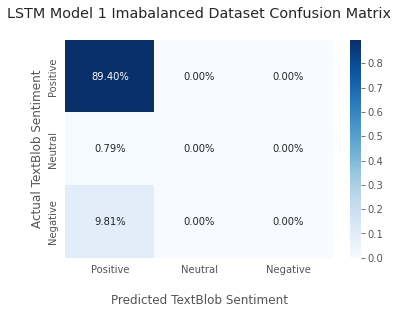

In [53]:
class LSTM_Model_1():
    def __new__(self):
        inp = Input(shape=(maxlen, ))
        embed_size = 128
        x = Embedding(num_words, embed_size)(inp)
        x = LSTM(60, return_sequences=True, name='lstm_layer')(x)
        x = GlobalMaxPool1D()(x)
        x = Dropout(0.1)(x)   # Dropout layer to avoid overfitting
        x = Dense(50, activation="relu")(x) # relu activation function
        x = Dropout(0.1)(x)
        x = Dense(1, activation="sigmoid")(x) # sigmoid activation function
        model = Model(inputs=inp, outputs=x)
        model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy']) # loss function = categorical_crossent , SGD optimizer
        
        return model

LSTM_Model_1 = LSTM_Model_1()
print(LSTM_Model_1.summary())
lstm_history = train_lstm_model(LSTM_Model_1, "LSTM_Model_1", 5, 64, X_train_pad, y_train, 0.2)
LSTM_Model_1_score = predict_func(LSTM_Model_1, "LSTM Model 1")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1893)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 1893, 128)         896000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 1893, 128)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


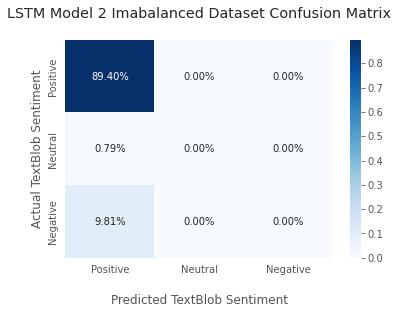

In [54]:
class LSTM_Model_2():
    def __new__(self):
        inp = Input(shape=(maxlen, ))
        x = Embedding(num_words, 128)(inp)
        x = SpatialDropout1D(0.25)(x)
        x = LSTM(100, dropout=0.5)(x)
        x = Dropout(0.5)(x)
        x = Dense(1, activation='sigmoid')(x)
        model = Model(inputs=inp, outputs=x)
        model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
        return model
    
LSTM_Model_2 = LSTM_Model_2()
print(LSTM_Model_2.summary())

lstm_history_2 = train_lstm_model(LSTM_Model_2, "LSTM_Model_2", 5, 64, X_train_pad, y_train, 0.2)
LSTM_Model_2_score = predict_func(LSTM_Model_2, "LSTM Model 2")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         896000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 150)        122400    
 l)                                                              
                                                                 
 global_max_pooling1d_1 (Glo  (None, 150)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 16)                2416      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


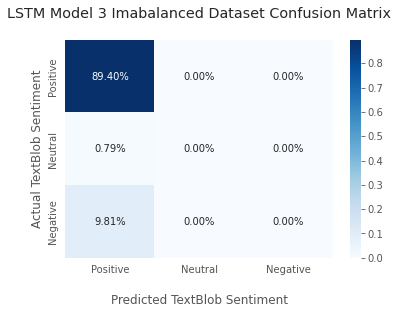

In [55]:
class LSTM_Model_3():
  def __new__(self):
    embed_size = 128
    model = Sequential()
    model.add(Embedding(num_words, embed_size))
    model.add(Bidirectional(LSTM(75, return_sequences = True)))
    model.add(GlobalMaxPool1D())
    model.add(Dense(16, activation="relu"))
    model.add(Dropout(0.03))
    model.add(Dense(8, activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
    
LSTM_Model_3 = LSTM_Model_3()
print(LSTM_Model_3.summary())

lstm_history_3 = train_lstm_model(LSTM_Model_3, "LSTM_Model_3", 5, 128, X_train_pad, y_train, 0.2)
LSTM_Model_3_score = predict_func(LSTM_Model_3, "LSTM Model 3")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          448000    
                                                                 
 lstm_2 (LSTM)               (None, None, 50)          23000     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 16)                816       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


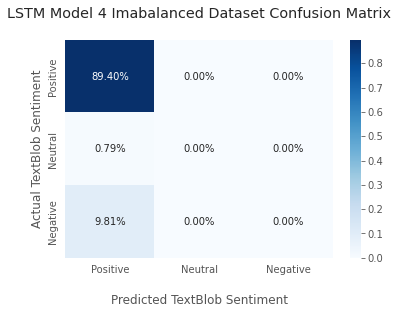

In [56]:
class LSTM_Model_4():
  def __new__(self):
    embed_size = 64
    model = Sequential()
    model.add(Embedding(num_words, embed_size))
    model.add(LSTM(50, return_sequences = True))
    model.add(GlobalMaxPool1D())
    model.add(Dense(16, activation="relu"))
    model.add(Dropout(0.8))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

LSTM_Model_4 = LSTM_Model_4()
print(LSTM_Model_4.summary())

lstm_history_4 = train_lstm_model(LSTM_Model_4, "LSTM_Model_4", 5, 16, X_train_pad, y_train, 0.2)
LSTM_Model_4_score = predict_func(LSTM_Model_4, "LSTM Model 4")

In [57]:
def generate_history_graph(lstm_history):
    plt.plot(lstm_history.history['accuracy'], 'b')
    plt.plot(lstm_history.history['val_accuracy'], 'r')
    plt.title('LSTM Model Accuracy'),
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

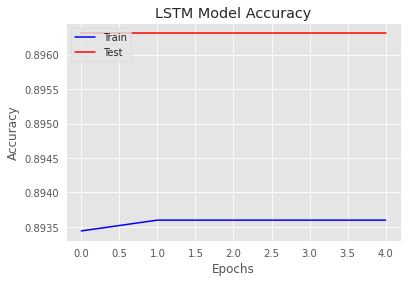

In [58]:
generate_history_graph(lstm_history)

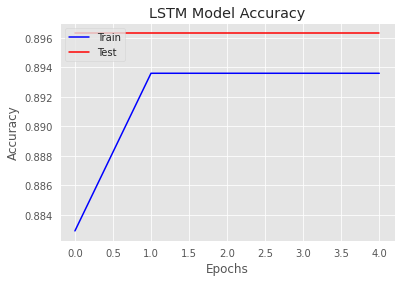

In [59]:
generate_history_graph(lstm_history_2)

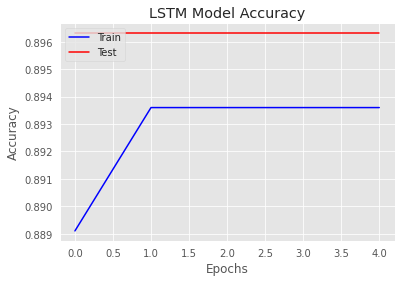

In [60]:
generate_history_graph(lstm_history_3)

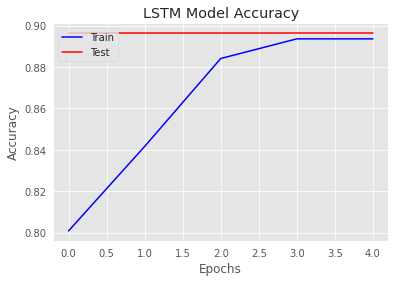

In [61]:
generate_history_graph(lstm_history_4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


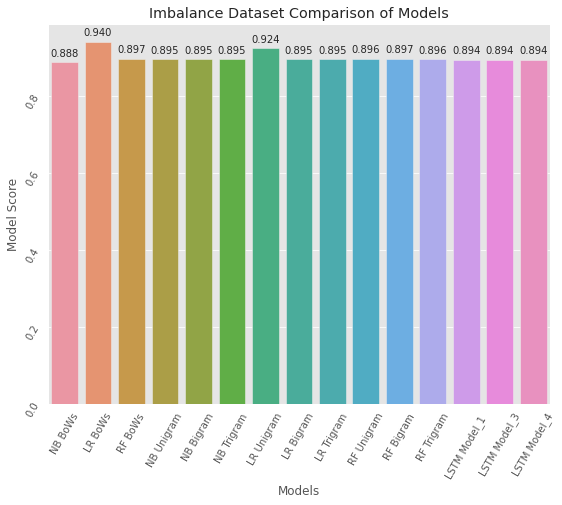

In [62]:
results = {"NB BoWs" : final_results[1],
          "LR BoWs" : final_results[20],
          "RF BoWs" : final_results[21],
          "NB Unigram" : final_results[22],
          "NB Bigram" : final_results[23],
          "NB Trigram" : final_results[24],
          "LR Unigram" : final_results[26],
          "LR Bigram" : final_results[27],
          "LR Trigram" : final_results[28],
          "RF Unigram" : final_results[30],
          "RF Bigram" : final_results[31],
          "RF Trigram" : final_results[32],
          "LSTM Model_1 " : LSTM_Model_1_score,
          "LSTM Model_3" : LSTM_Model_3_score,
          "LSTM Model_4": LSTM_Model_4_score}
          
plt.figure(figsize=(9, 7))
plt.title('Imbalance Dataset Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Model Score')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plots = sns.barplot([i for i in results], [results[i] for i in results])
for p in plots.patches:
    plots.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()